In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
import random

In [3]:
data = r"clean_cad.csv"
clean_data = pd.read_csv(data)
clean_data["Call Time"] = pd.to_datetime(clean_data["Call Time"], errors='coerce')
clean_data

,Unnamed: 0,Call Time,Reason for Dispatch,Call Sign,2 Call Sign,Disposition
0,0,2016-01-01 00:00:04,ASSAULT,5E57,5E57,ADVISED
1,1,2016-01-01 00:00:04,ASSAULT,5E57,4X40,ADVISED
2,2,2016-01-01 00:00:04,ASSAULT,5E57,4E53,ADVISED
3,3,2016-01-01 00:00:24,TRAFFIC STOP,5T81,5T81,ADVISED
4,4,2016-01-01 00:02:45,CHECK WELFARE,3X90,3F61,ASSISTED
...,...,...,...,...,...,...
1616824,1616824,2023-12-31 23:23:05,CRIMINAL TRESPASS,NaN,NaN,DISREGARD
1616825,1616825,2023-12-31 23:26:00,AUDIBLE ALARM,NaN,NaN,INFORMATION ONLY
1616826,1616826,2023-12-31 23:32:06,SUSPICIOUS CONDITIONS,NaN,NaN,QUALITY OF LIFE - NO DISPATCH
1616827,1616827,2023-12-31 23:33:30,SHOTS FIRED,NaN,NaN,REFERRED TO OTHER AGENCY


In [4]:
def time_filter_year(table: pd.DataFrame, start_time: int, end_time: int):
    """Filters the call time column of the data. Based off year"""
    filtered_table = table[(table["Call Time"].dt.year >= start_time) & (table["Call Time"].dt.year < end_time)]
    return filtered_table

def time_filter_month(table: pd.DataFrame, start_year: int, start_month: int, end_year: int, end_month: int):
    """Filters the 'Call Time' column of the data based on month and year."""
    # Creating a mask to filter data between two datetime boundaries
    start_date = pd.Timestamp(year=start_year, month=start_month, day=1)
    if end_month == 12:
        end_date = pd.Timestamp(year=end_year + 1, month=1, day=1)
    else:
        end_date = pd.Timestamp(year=end_year, month=end_month + 1, day=1)

    filtered_table = table[(table["Call Time"] >= start_date) & (table["Call Time"] < end_date)]
    return filtered_table

In [5]:
def percent_cahoots_calls(df: pd.DataFrame, cahoot_call_signs: list):
    count_cahoots = 0
    for sign in cahoot_call_signs:
        count_cahoots += len(df[(df["Call Sign"] == sign) | (df["2 Call Sign"] == sign)])
    return (count_cahoots / len(df)) * 100

In [6]:
def filter_incidents(df: pd.DataFrame, column_name, incidents: list) -> pd.DataFrame:
    for i in incidents:
        df = df[df[column_name] != i]
    return df

In [7]:
cahoots_call_signs = ["1J77", "3J78", "4J79"]
excluded_incidents = ["TRANSPORT", "TRANSPORT, CAHOOTS"]
excluded_dispositions = ['DISREGARD', 'DISREGARDED BY DISPATCH',
                         'WILL CALL BACK', 'INFORMATION ONLY', 'UNABLE TO DISPATCH',
                         'REFERRED TO OTHER AGENCY', 'DISREGARDED BY PATROL SUPERVISOR',
                         'CALLER CALLED BACK', 'ACCIDENTALLY CHOSE NEW EVENT',
                         'UNABLE TO LOCATE', 'QUALITY OF LIFE - NO DISPATCH',
                         'RELAYED TO UNIVERSITY OF OREGON POLICE', 'FIX-IT TICKET',
                         'RELAYED TO LANE COUNTY SHERIFFS OFFICE', 'CANCEL WHILE ENROUTE']

In [8]:
clean_data = filter_incidents(clean_data, "Disposition", excluded_dispositions)

In [9]:
def calc_monthly_percentages(clean_data: pd.DataFrame, call_signs: list) -> pd.DataFrame:
    percentages = [ ]
    times = [ ]
    for year in range(2016, 2024):
        for month in range(1, 13):  # Months from January (1) to December (12)
            next_month = month + 1 if month < 12 else 1
            next_year = year if month < 12 else year + 1
            month_table = time_filter_month(clean_data, year, month, next_year, next_month)
            percent = percent_cahoots_calls(month_table, call_signs)
            percentages.append(percent)
            times.append(datetime(year=year, month=month, day=1))
            # print(f"In {year}-{month}, Cahoots handled {percent:.2f}% of the total calls")
    return pd.DataFrame({"Time": times, "Percentage": percentages})

results_table = calc_monthly_percentages(clean_data, cahoots_call_signs)

In [10]:
#Manually Finding the first occurrance of each call sign

target_call_signs = ["1J77", "3J78", "4J79"]

filtered_call_signs = clean_data[clean_data['Call Sign'].isin(target_call_signs)]

first_occurrence_call_sign = filtered_call_signs.groupby('Call Sign')['Call Time'].min()
first_1J77 = first_occurrence_call_sign['1J77']
first_3J78 = first_occurrence_call_sign['3J78']
first_4J79 = first_occurrence_call_sign['4J79']

last_occurrence = filtered_call_signs.groupby('Call Sign')['Call Time'].max()
last_1J77 = last_occurrence['1J77']
last_3J78 = last_occurrence['3J78']
last_4J79 = last_occurrence['4J79']

# print(f"First 1J77: {first_1J77}\n"
#       f"First 3J78: {first_3J78}\n"
#       f"First 4J79: {first_4J79}\n")
# 
# print(f"Last 1J77: {last_1J77}\n"
#       f"Last 3J78: {last_3J78}\n"
#       f"Last 4J79: {last_4J79}\n")

times_1J77 = {
    "First": first_1J77,
    "Last": last_1J77
}
times_3J78 = {
    "First": first_3J78,
    "Last": last_3J78
}
times_4J79 = {
    "First": first_4J79,
    "Last": last_4J79
}
call_sign_times = {
    "3J78": times_3J78,
    "1J77": times_1J77,
    "4J79": times_4J79
}


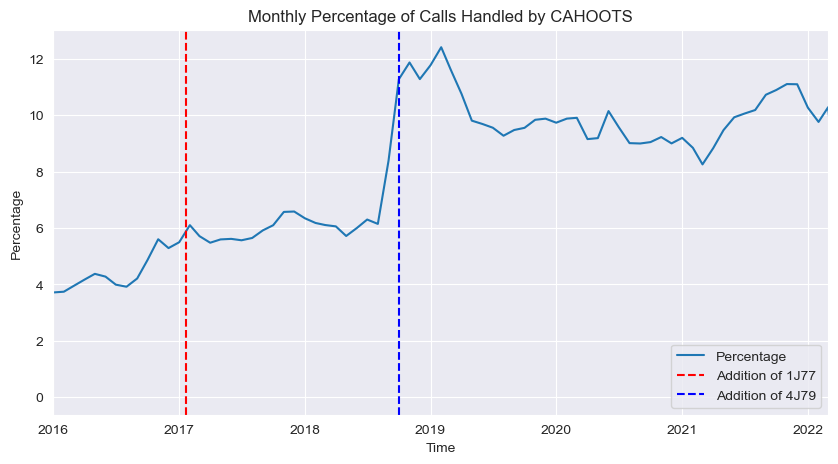

In [11]:
plt.figure(figsize=(10, 5))  
plt.plot(results_table['Time'], results_table['Percentage'], label="Percentage")  
plt.title('Monthly Percentage of Calls Handled by CAHOOTS') 
plt.xlabel('Time')  
plt.ylabel('Percentage')  
plt.grid(True)  

plt.axvline(pd.to_datetime(call_sign_times['1J77']['First']), label='Addition of 1J77', color='r', linestyle='--')
plt.axvline(pd.to_datetime(call_sign_times['4J79']['First']), label='Addition of 4J79', color='b', linestyle='--')

plt.legend(loc="lower right")

plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()

Dig deeper into uptick in 2018. Added 2nd van? Less total police calls, increase in cahoots calls, or both?
Stick with 2022 data cutoff. 

In [12]:
results_1_shift = calc_monthly_percentages(clean_data, ["3J78"])
results_2_shift = calc_monthly_percentages(clean_data, ["3J78", "1J77"])
results_3_shift = calc_monthly_percentages(clean_data, ["3J78", "1J77", "4J79"])

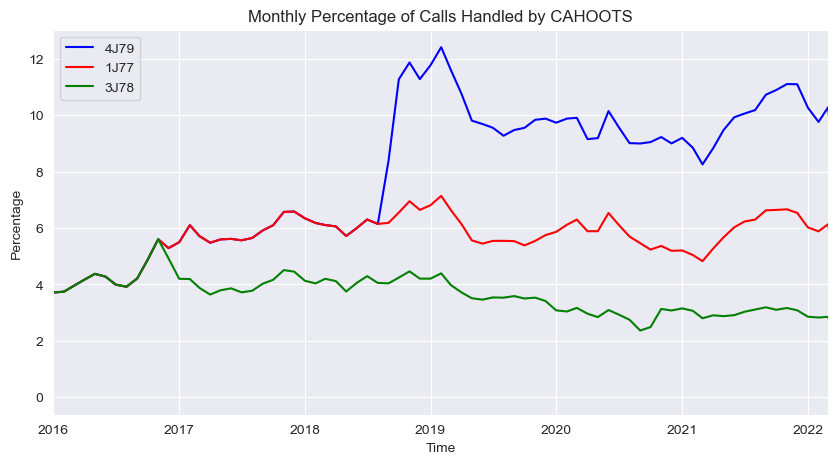

In [13]:
plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(results_3_shift['Time'], results_3_shift['Percentage'], color='b', label="4J79")
plt.plot(results_2_shift['Time'], results_2_shift['Percentage'], color='r', label="1J77")
plt.plot(results_1_shift['Time'], results_1_shift['Percentage'], color='g', label="3J78")

plt.title('Monthly Percentage of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Percentage')  # Y-axis label
plt.grid(True)  # Turn on the grid
plt.legend(loc="upper left")


plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()

Claims that 1J77 was added on 01-01-2017, I predict there was a slow ramp up (increase in capacity and hiring before adding another shift) 

In [14]:
results_3J78 = calc_monthly_percentages(clean_data, ["3J78"])
results_1J77 = calc_monthly_percentages(clean_data, ["1J77"])
results_4J79 = calc_monthly_percentages(clean_data, ["4J79"])

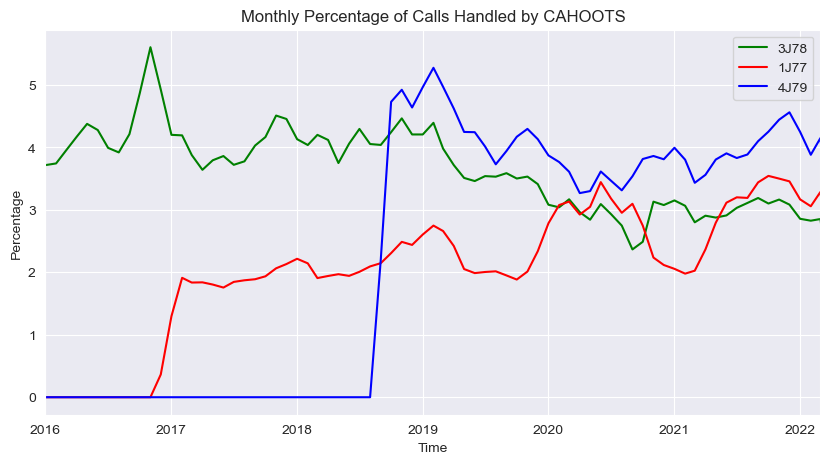

In [15]:

plt.figure(figsize=(10, 5))  # Set the figure size
    
plt.plot(results_3J78['Time'], results_3J78['Percentage'], label="3J78", color='g')
plt.plot(results_1J77['Time'], results_1J77['Percentage'], label="1J77", color='r')
plt.plot(results_4J79['Time'], results_4J79['Percentage'], label="4J79", color='b')
    
plt.title('Monthly Percentage of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Percentage')  # Y-axis label
plt.grid(True)  # Turn on the grid
plt.legend(loc='upper right')
    
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])
    
plt.show()

## Observations from graph:
- Spike in 3J78 before 5-10 AM service hours were added. Why?
    - Possible ramp up in hiring before added hours?
    - Upgrades to handle longer van hours?
    - Started experimenting with shift before officially implementing it?
    - Going to look at same graph with count and see if it is similar.
    - If you're reading this and have any ideas please let me know!!
- 5 - 10 AM shift does handle fewer calls, in the beginning, however they balance out. Why?
- New van handles 1.35% more calls on average than older one. Is it faster? More comfortable? Better equipment? In all actuality though what changed to make it so consistently more efficient?
- Expected drop in 2020 (Covid) 


In [16]:
def average_in_time_range(table, start_time, end_time):
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    table = table[(table['Time'] >= start_time) & (table['Time'] <= end_time)]
    return table['Percentage'].mean()

mean_3J78_1_shift = average_in_time_range(results_3J78, call_sign_times["3J78"]['First'], call_sign_times["1J77"]['First'])
mean_3J78_2_shift = average_in_time_range(results_3J78, call_sign_times["1J77"]['First'], call_sign_times["4J79"]['First'])
mean_3J78_3_shift = average_in_time_range(results_3J78, call_sign_times["4J79"]['First'], call_sign_times["4J79"]['Last'])
print(mean_3J78_1_shift)
print(mean_3J78_2_shift)
print(mean_3J78_3_shift)

mean_1J77_2_shift = average_in_time_range(results_1J77, call_sign_times["1J77"]['First'], call_sign_times["4J79"]['First'])
mean_1J77_3_shift = average_in_time_range(results_1J77, call_sign_times["4J79"]['First'], call_sign_times["4J79"]['Last'])
print(mean_1J77_2_shift)
print(mean_1J77_3_shift)

mean_4J79_3_shift = average_in_time_range(results_4J79, call_sign_times["4J79"]['First'], call_sign_times["4J79"]['Last'])
print(mean_4J79_3_shift)

4.352566966529564
4.044407004260616
3.127598145780887
1.9787485014092259
2.615672241290709
3.9027932912158194


In [17]:
def calculate_counts(table: pd.DataFrame, call_signs: list):
    # Group by month and count calls
    monthly_call_count = table.groupby(table['Call Time'].dt.to_period('M')).size().rename('Total Calls')

    # Filter data for specific call signs
    monthly_cahoots = table[table['Call Sign'].isin(call_signs)]
    monthly_call_sign = monthly_cahoots.groupby(monthly_cahoots['Call Time'].dt.to_period('M')).size().rename('Cahoots Calls')

    # Merge the counts
    t_v_c = pd.merge(monthly_call_count, monthly_call_sign, left_index=True, right_index=True, how='left').reset_index()
    t_v_c['Call Time'] = t_v_c['Call Time'].dt.to_timestamp()

    # Calculate Non Cahoots Calls
    t_v_c['Non Cahoots Calls'] = t_v_c['Total Calls'] - t_v_c['Cahoots Calls'].fillna(0)

    # Ensure correct columns are displayed
    t_v_c = t_v_c[['Call Time', 'Non Cahoots Calls', 'Cahoots Calls', 'Total Calls']]
    return t_v_c

In [18]:
total_vs_cahoot = calculate_counts(clean_data, target_call_signs)
total_vs_cahoot

,Call Time,Non Cahoots Calls,Cahoots Calls,Total Calls
0,2016-01-01,12512.0,414.0,12926
1,2016-02-01,12808.0,374.0,13182
2,2016-03-01,12448.0,424.0,12872
3,2016-04-01,12221.0,397.0,12618
4,2016-05-01,12607.0,454.0,13061
...,...,...,...,...
91,2023-08-01,12752.0,NaN,12752
92,2023-09-01,11842.0,NaN,11842
93,2023-10-01,11396.0,NaN,11396
94,2023-11-01,10812.0,NaN,10812


(16801.0, 19052.0)

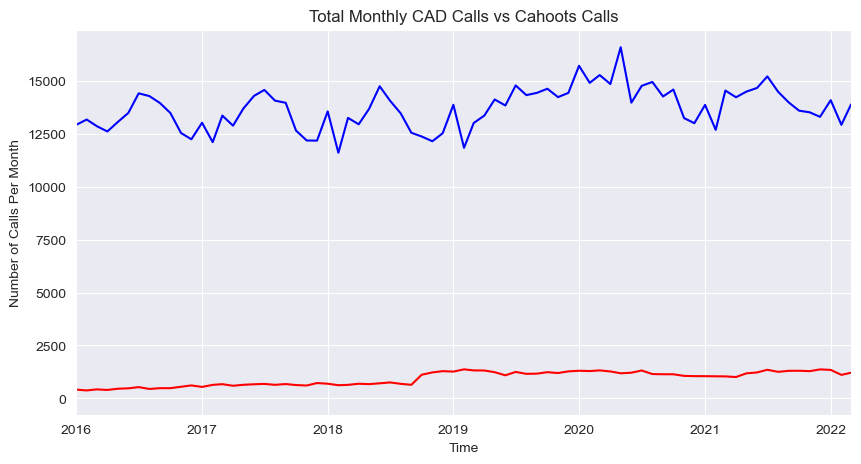

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Total Calls'], color='b')
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Cahoots Calls'], color='r')
plt.xlabel("Time")
plt.ylabel("Number of Calls Per Month")
plt.title("Total Monthly CAD Calls vs Cahoots Calls")
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

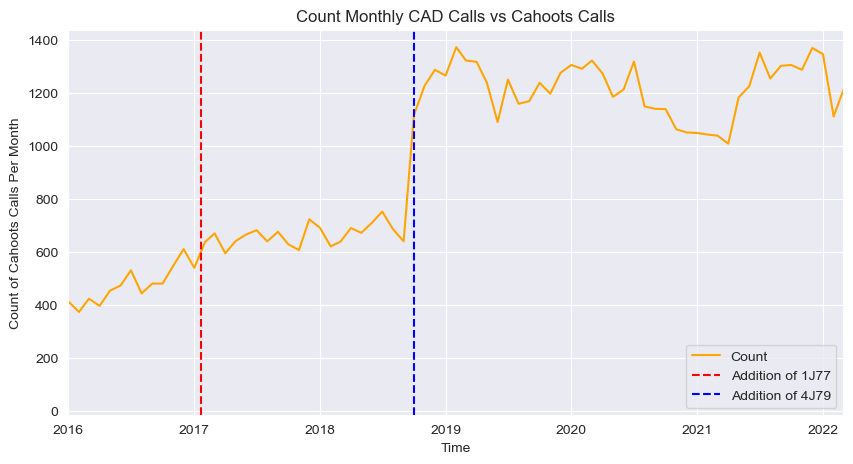

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Cahoots Calls'], color="orange", label="Count")
plt.ylabel("Count of Cahoots Calls Per Month")
plt.xlabel("Time")
plt.title("Count Monthly CAD Calls vs Cahoots Calls")
plt.axvline(pd.to_datetime(call_sign_times['1J77']['First']), label='Addition of 1J77', color='r', linestyle='--')
plt.axvline(pd.to_datetime(call_sign_times['4J79']['First']), label='Addition of 4J79', color='b', linestyle='--')
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])
plt.legend(loc='lower right')
plt.show()

In [21]:
total_vs_3J78 = calculate_counts(clean_data, ['3J78'])
total_vs_1J77 = calculate_counts(clean_data, ['1J77'])
total_vs_4J79 = calculate_counts(clean_data, ['4J79'])
total_vs_4J79

,Call Time,Non Cahoots Calls,Cahoots Calls,Total Calls
0,2016-01-01,12926.0,NaN,12926
1,2016-02-01,13182.0,NaN,13182
2,2016-03-01,12872.0,NaN,12872
3,2016-04-01,12618.0,NaN,12618
4,2016-05-01,13061.0,NaN,13061
...,...,...,...,...
91,2023-08-01,12752.0,NaN,12752
92,2023-09-01,11842.0,NaN,11842
93,2023-10-01,11396.0,NaN,11396
94,2023-11-01,10812.0,NaN,10812


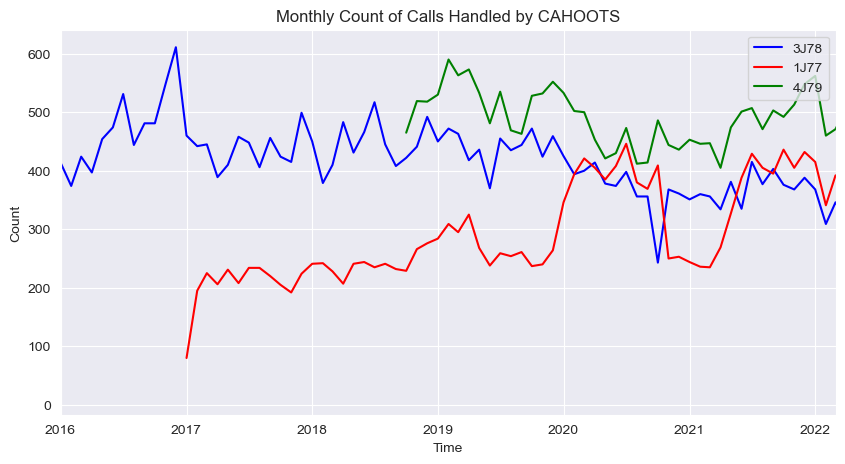

In [22]:
plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(total_vs_3J78['Call Time'], total_vs_3J78['Cahoots Calls'], label="3J78", color='b')
plt.plot(total_vs_1J77['Call Time'], total_vs_1J77['Cahoots Calls'], label="1J77", color='r')
plt.plot(total_vs_4J79['Call Time'], total_vs_4J79['Cahoots Calls'], label="4J79", color='g')

plt.title('Monthly Count of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.grid(True)  # Turn on the grid
plt.legend(loc='upper right')

plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()

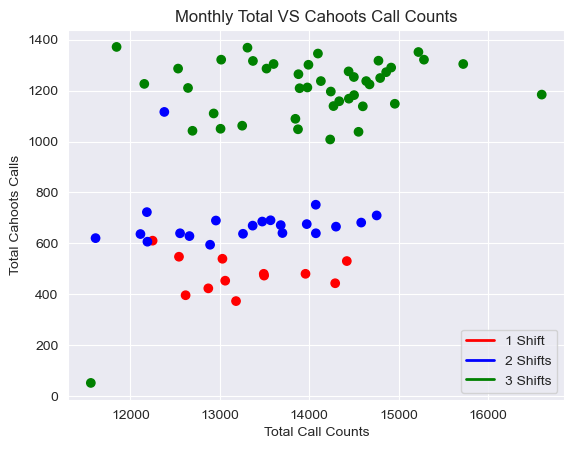

In [23]:


time_ranges = [
    (pd.Timestamp(first_3J78), pd.Timestamp(first_1J77), 'red'),
    (pd.Timestamp(first_1J77 ), pd.Timestamp(first_4J79), 'blue'),
    (pd.Timestamp(first_4J79), pd.Timestamp(last_1J77), 'green'),
]

# Function to assign colors based on time ranges
def assign_color(call_time, ranges):
    for start, end, color in ranges:
        if start <= call_time < end:
            return color
    return None  # Default color if no range is matched

# Apply the function to create a color column
total_vs_cahoot['Color'] = total_vs_cahoot['Call Time'].apply(lambda x: assign_color(x, time_ranges))
total_vs_cahoot = total_vs_cahoot.dropna(subset=['Color'])


plt.scatter(total_vs_cahoot['Total Calls'], total_vs_cahoot['Cahoots Calls'], c=total_vs_cahoot["Color"])
plt.xlabel("Total Call Counts")
plt.ylabel("Total Cahoots Calls")
plt.title("Monthly Total VS Cahoots Call Counts")

custom_handles = [plt.Line2D([0], [0], color='red', lw=2, label='1 Shift'),
                  plt.Line2D([0], [0], color='blue', lw=2, label='2 Shifts'),
                  plt.Line2D([0], [0], color='green', lw=2, label='3 Shifts')]

plt.legend(handles=custom_handles, loc='lower right')

total_vs_cahoot = total_vs_cahoot[:-1] # (Dropping a value that obscures the results)
plt.show()


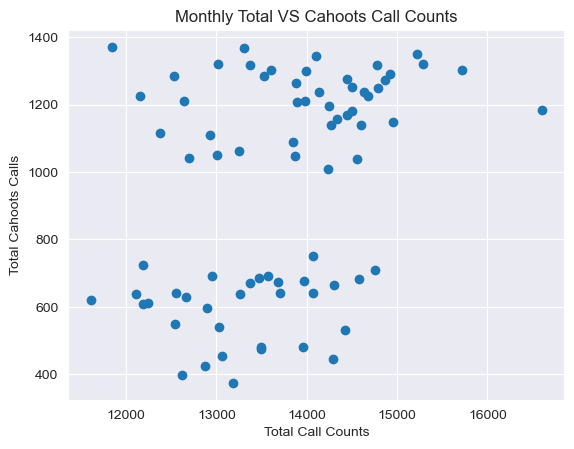

In [24]:


time_ranges = [
    (pd.Timestamp(first_3J78), pd.Timestamp(first_1J77), 'red'),
    (pd.Timestamp(first_1J77 ), pd.Timestamp(first_4J79), 'blue'),
    (pd.Timestamp(first_4J79), pd.Timestamp(last_1J77), 'green'),
]

# Function to assign colors based on time ranges
def assign_color(call_time, ranges):
    for start, end, color in ranges:
        if start <= call_time < end:
            return color
    return None  # Default color if no range is matched

# Apply the function to create a color column
total_vs_cahoot['Color'] = total_vs_cahoot['Call Time'].apply(lambda x: assign_color(x, time_ranges))
total_vs_cahoot = total_vs_cahoot.dropna(subset=['Color'])


plt.scatter(total_vs_cahoot['Total Calls'], total_vs_cahoot['Cahoots Calls']) #, c=total_vs_cahoot["Color"])
plt.xlabel("Total Call Counts")
plt.ylabel("Total Cahoots Calls")
plt.title("Monthly Total VS Cahoots Call Counts")



# plt.legend(handles=custom_handles, loc='lower right')

total_vs_cahoot = total_vs_cahoot[:-1] # (Dropping a value that obscures the results)
plt.show()


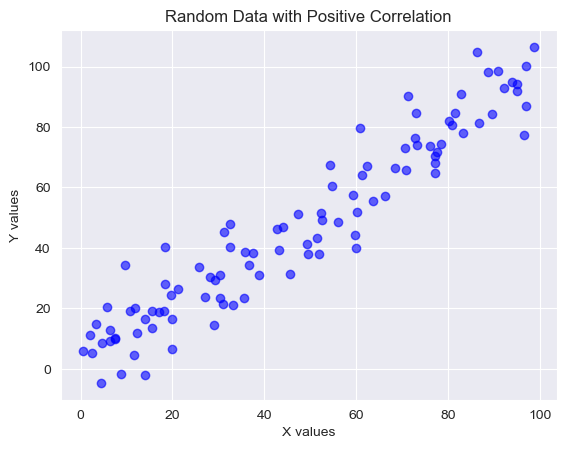

In [25]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate random x values
x = np.random.rand(100) * 100

# Generate y values with a positive correlation to x
y = x + np.random.normal(0, 10, 100)  # Add some noise

# Create a scatter plot

plt.scatter(x, y, alpha=0.6, color='blue')
plt.title('Random Data with Positive Correlation')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()

In [26]:
shifts_1 = clean_data[(clean_data["Call Time"] > pd.Timestamp(call_sign_times['3J78']['First'])) & (clean_data["Call Time"] < pd.Timestamp(call_sign_times['1J77']['First']))]
shifts_2 = clean_data[(clean_data["Call Time"] > pd.Timestamp(call_sign_times['1J77']['First'])) & (clean_data["Call Time"] < pd.Timestamp(call_sign_times['4J79']['First']))]
shifts_3 = clean_data[(clean_data["Call Time"] > pd.Timestamp(call_sign_times['4J79']['First'])) & (clean_data["Call Time"] < pd.Timestamp(call_sign_times['3J78']['Last']))]
shifts_2

,Unnamed: 0,Call Time,Reason for Dispatch,Call Sign,2 Call Sign,Disposition
1169,1169,2018-01-01 00:01:07,SHOTS FIRED,5E65,5E65,QUIET ON ARRIVAL
1175,1175,2018-01-01 00:09:30,CRIMINAL MISCHIEF,NaN,NaN,REPORT TAKEN
1177,1177,2018-01-01 00:11:58,SHOTS FIRED,6E59,6E59,PATROL CHECK
1178,1178,2018-01-01 00:12:11,MOTOR VEH ACC UNKNOWN INJ,5E35,5E35,ASSISTED
1179,1179,2018-01-01 00:12:11,MOTOR VEH ACC UNKNOWN INJ,5E35,5T86,ASSISTED
...,...,...,...,...,...,...
1613621,1613621,2017-12-31 23:56:56,ASSAULT WITH INJURY,3J79,4E12,ASSISTED
1613622,1613622,2017-12-31 23:56:56,ASSAULT WITH INJURY,3J79,3J79,ASSISTED
1613623,1613623,2017-12-31 23:57:54,DISPUTE,6E15,6E15,RESOLVED
1613624,1613624,2017-12-31 23:57:54,DISPUTE,6E15,6E28,RESOLVED


In [60]:
def shuffle_dataframe(table, n):
    new_table = table.iloc[:n].copy()
    shuffled_call_signs = np.random.choice(new_table['Call Sign'].values, n)
    # print(shuffled_call_signs)
    new_table["Call Sign"] = shuffled_call_signs
    pd.to_datetime(new_table["Call Time"])
    return new_table

def shuffled_percentages(table, n, k):
    mean_list = []
    for _ in range(n):
        shuffled_list = shuffle_dataframe(table, k)
        # print(shuffled_list)
        
        count_table = calculate_counts(shuffled_list, target_call_signs)
        count_table["Percentage"] = count_table["Cahoots Calls"] / count_table["Total Calls"] * 100
        # print(count_table)
        mean_list += [count_table["Percentage"].mean()]
    return mean_list

In [68]:
iterations = 1000
inside_iterations = 10000

means_1_shift = shuffled_percentages(shifts_1, iterations, inside_iterations)
means_2_shift = shuffled_percentages(shifts_2, iterations, inside_iterations)
means_3_shift = shuffled_percentages(shifts_3, iterations, inside_iterations)
# means_2_shift

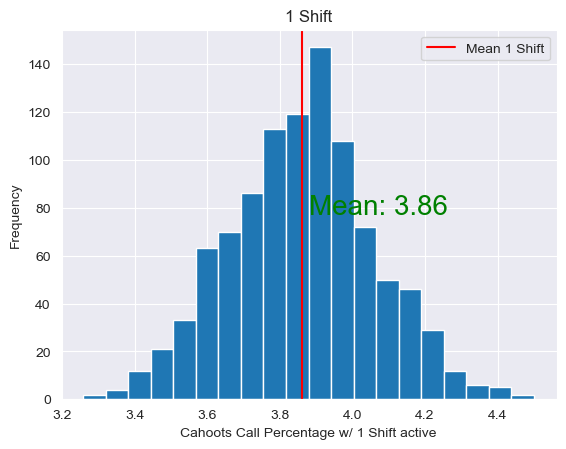

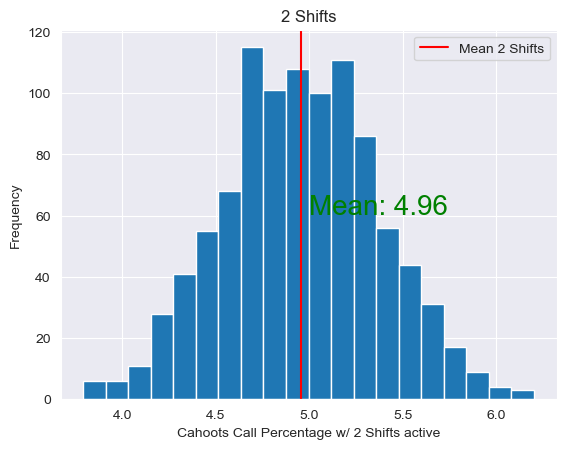

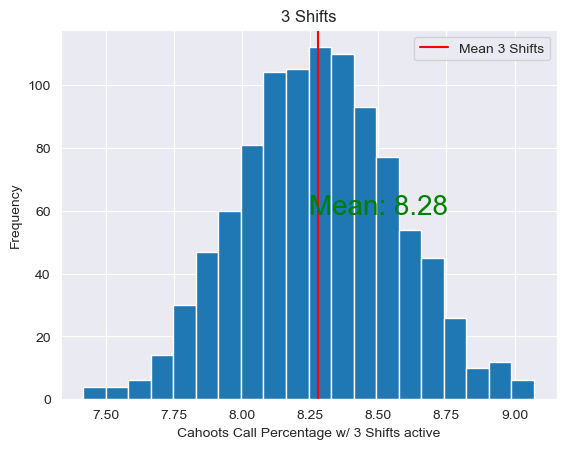

[5.9708379688740845,
 4.880103497724106,
 4.729582048417579,
 4.731666215225369,
 5.623935709837221,
 4.207363676648672,
 4.601002030486054,
 4.938798557049029,
 4.402098686759573,
 5.121574602635524,
 4.98882625108842,
 4.375658223714619,
 4.695681652518173,
 5.568970616939524,
 4.4955708763606115,
 4.715100549897031,
 5.453995363151839,
 4.7973828402163905,
 4.89623079586409,
 5.2609061526603735,
 5.062441176122247,
 5.407697635539673,
 4.524095506213355,
 4.790361274550293,
 4.932215358571286,
 5.598702679223349,
 5.130241967921059,
 5.157559165342721,
 5.525526121377876,
 5.121136235447171,
 5.334082710505847,
 6.156467246511097,
 5.094695772402217,
 4.895792428675736,
 5.321685378793087,
 5.159204964962157,
 5.1017173380683145,
 4.752730912223662,
 5.093049972782781,
 5.455641162771274,
 4.36117672519407,
 5.2125242582404185,
 4.293375933395259,
 4.590250498392731,
 4.688660086852076,
 5.228651556380404,
 5.221191623525952,
 4.644008158859347,
 5.214170057859855,
 5.66902600501830

In [85]:
shifts = [means_1_shift, means_2_shift, means_3_shift]
shift_names = ["1 Shift", "2 Shifts", "3 Shifts"]

for shift, name in zip(shifts, shift_names):
    plt.hist(shift, bins=20)
    plt.axvline(np.mean(shift), color='r', label = f"Mean {name}")
    plt.title(name)
    plt.legend(loc='upper right')
    ax = plt.gca()
    plt.text(np.mean(ax.get_xlim()), np.mean(ax.get_ylim()), f"Mean: {round(np.mean(shift), 2)}", color='g', size=20)
    plt.ylabel("Frequency")
    plt.xlabel(f"Cahoots Call Percentage w/ {name} active")
    
    plt.show()
means_2_shift

In [81]:
test_1 = stats.kstest(means_1_shift, means_2_shift)
test_2 = stats.kstest(means_1_shift, means_3_shift)
test_3 = stats.kstest(means_2_shift, means_3_shift)
print(f"1 Shift: {test_1}")
print(f"2 Shifts: {test_2}")
print(f"3 Shifts: {test_3}")

1 Shift: KstestResult(statistic=0.93, pvalue=0.0, statistic_location=4.271474783007196, statistic_sign=1)
2 Shifts: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=4.500172493357885, statistic_sign=1)
3 Shifts: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=6.203203341311616, statistic_sign=1)
